In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
Health=pd.read_excel('Health.xlsx')
Health.head()

,sen,jens,dard ghafase sineh,feshar khun dar halat esterahat,kolestrol,ghand khun nashta,navar ghalb dar halat esterahat,hadaksar zaraban ghalb,anjin sadri nashi az varzesh,afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat,shibe tamrin dar oje tamrin dar maghtae ST,tedad oroghe bozorg rangi ba flourosopy,talasemi,ehtemal voghu bimari ghalbi
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [2]:
Health=Health.rename(columns={'ehtemal voghu bimari ghalbi':'Outcome'})
Health.head(3)

,sen,jens,dard ghafase sineh,feshar khun dar halat esterahat,kolestrol,ghand khun nashta,navar ghalb dar halat esterahat,hadaksar zaraban ghalb,anjin sadri nashi az varzesh,afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat,shibe tamrin dar oje tamrin dar maghtae ST,tedad oroghe bozorg rangi ba flourosopy,talasemi,Outcome
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1


In [3]:
from sklearn.model_selection import train_test_split
X=Health[['sen','jens','dard ghafase sineh','feshar khun dar halat esterahat','kolestrol','ghand khun nashta','navar ghalb dar halat esterahat','hadaksar zaraban ghalb','anjin sadri nashi az varzesh','afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat','shibe tamrin dar oje tamrin dar maghtae ST','talasemi']]
y=Health['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [6]:
col = Health.columns       # .columns gives columns names in data 
print(col)

Index(['sen', 'jens', 'dard ghafase sineh', 'feshar khun dar halat esterahat',
       'kolestrol', 'ghand khun nashta', 'navar ghalb dar halat esterahat',
       'hadaksar zaraban ghalb', 'anjin sadri nashi az varzesh',
       'afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat',
       'shibe tamrin dar oje tamrin dar maghtae ST',
       ' tedad oroghe bozorg rangi ba flourosopy', 'talasemi', 'Outcome'],
      dtype='object')


In [7]:
#Univariate feature selection and random forest classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [8]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [ 8.11676284  1.68540248  7.0774669  12.09677442 16.36794033  0.43896688
  1.53855855 97.03893628 22.29029316 32.80458337  2.90601961 26.31185546]
Feature list: Index(['sen', 'jens', 'dard ghafase sineh', 'feshar khun dar halat esterahat',
       'kolestrol', 'ghand khun nashta', 'navar ghalb dar halat esterahat',
       'hadaksar zaraban ghalb', 'anjin sadri nashi az varzesh',
       'afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat',
       'shibe tamrin dar oje tamrin dar maghtae ST', 'talasemi'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy is:  (111    0
150    0
12     1
216    0
139    0
74     1
208    1
171    0
187    1
214    0
73     1
15     0
267    0
106    1
22     1
224    0
266    1
250    0
248    1
136    1
64     1
126    1
237    0
199    0
89     0
52     1
296    1
246    0
279    0
63     0
      ..
75     0
124    0
145    1
158    0
252    0
109    1
173    1
4      0
96     1
272    0
61     0
67     0
134    0
194    0
166    1
276    1
40     1
182    1
13     0
107    1
283    0
3      0
154    1
125    1
24     1
30     0
77     0
274    1
257    0
19     0
Name: Outcome, Length: 149, dtype: int64, array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0

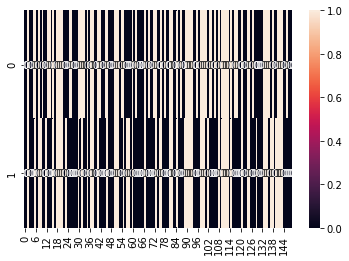

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
accuracy_score= (y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',accuracy_score)
confusion_matrix=(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [10]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

In [11]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['sen', 'dard ghafase sineh', 'kolestrol', 'hadaksar zaraban ghalb',
       'afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat'],
      dtype='object')


In [12]:
#Recursive feature elimination with cross validation and random forest classification
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 12
Best features : Index(['sen', 'jens', 'dard ghafase sineh', 'feshar khun dar halat esterahat',
       'kolestrol', 'ghand khun nashta', 'navar ghalb dar halat esterahat',
       'hadaksar zaraban ghalb', 'anjin sadri nashi az varzesh',
       'afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat',
       'shibe tamrin dar oje tamrin dar maghtae ST', 'talasemi'],
      dtype='object')


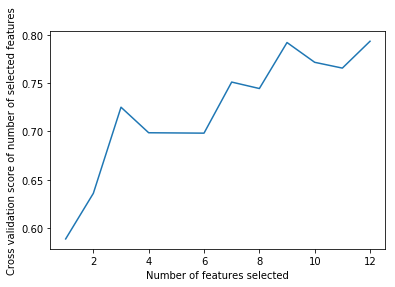

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 7 (0.213939)
2. feature 2 (0.122862)
3. feature 9 (0.118408)
4. feature 11 (0.113502)
5. feature 0 (0.110512)
6. feature 8 (0.101944)
7. feature 4 (0.071779)
8. feature 3 (0.059098)
9. feature 10 (0.040051)
10. feature 1 (0.022832)
11. feature 5 (0.014430)
12. feature 6 (0.010642)


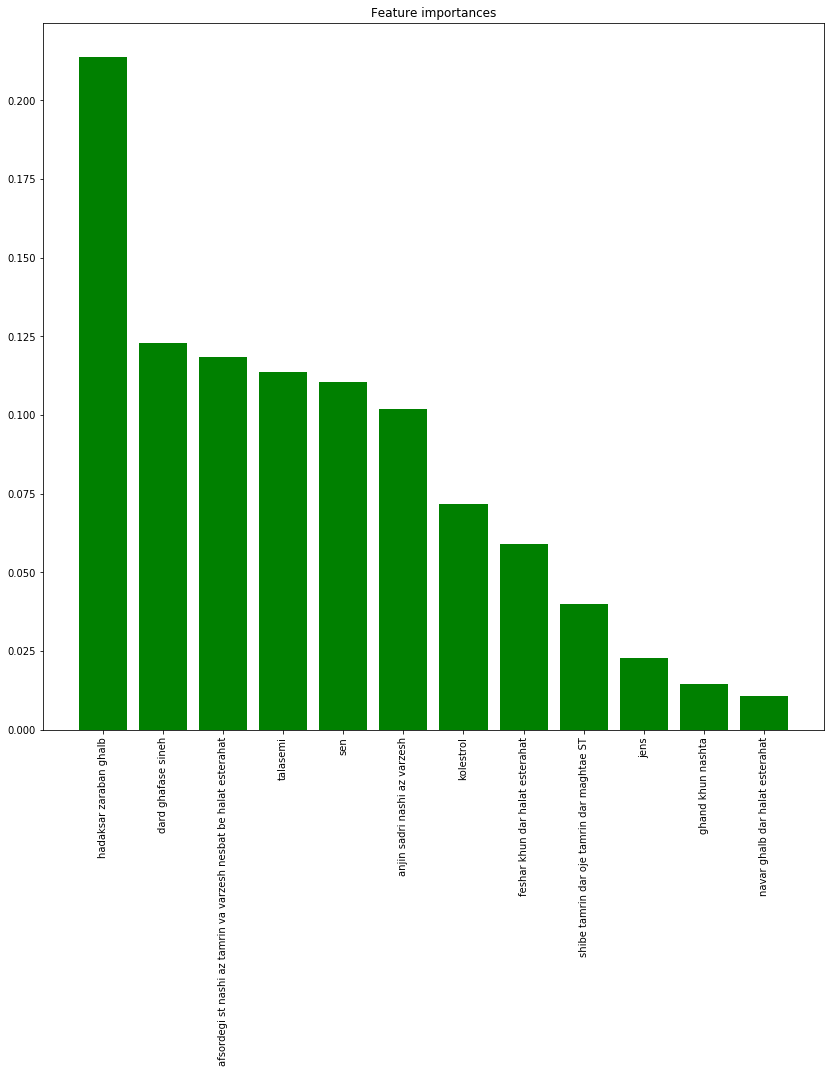

In [14]:
#Tree based feature selection and random forest classification
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=43) 
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
#std = np.std([tree.feature_importances_ for tree in clf_rf.estimator_params],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="g", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Text(0,0.5,'explained_variance_ratio_')

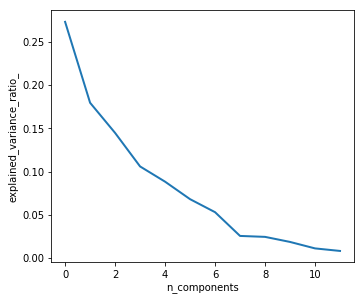

In [15]:
#Feature Extraction

# split data train 70 % and test 50 %
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)
#normalization
x_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
x_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(6, 5))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')